In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Pre-define alpha level according to the guideline
alpha_level = 0.005

In [3]:
file = pd.read_csv('movieReplicationSet.csv')

In [4]:
movies = file.iloc[:, 0:400]

In [5]:
# Convert the data into numeric type for calculation
# Assuming every data is valuable, I keep the NaN data 
# (not doing the row-wise removal of NaN here in contributing the rating of each movie).

movies = movies.apply(pd.to_numeric, errors='coerce')

## 1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]

In [20]:
# Find median popularity of all movies
# Assumption - the greater the number of ratings the more popular the movie is

# Find how many non-NaN ratings per movie has
movies_popularity = movies.count()

# Find the median of the popularity
popularity_med = movies_popularity.median()

In [21]:
# Find Averages of Each Movie

# Use mean here to measure the ratings of each movie because mean is a quick way to provide a summary of 
# the overall ratings of a movie. Outlier ratings are expected and included when calculating means because
# they also reflect a population, no matter how small or large that population is, that might have an impact 
# in the real world to contribute to a more comprehensive rating of the movie.

# Find means of all movies
movies_mean = movies.mean()

# Split means of all movies
movies_mean_low_popularity = movies.mean()[movies_popularity <= popularity_med]
movies_mean_high_popularity = movies.mean()[movies_popularity > popularity_med]

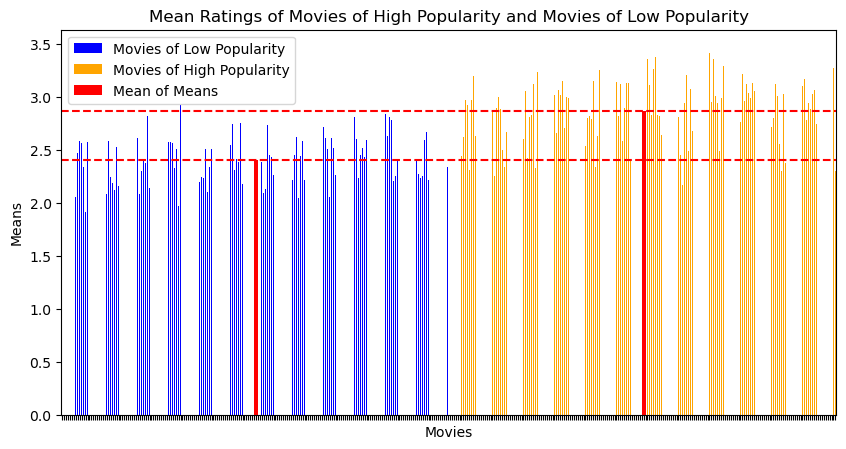

In [22]:
# Visualize the mean ratings of both categories to see if there is a clear cut of mean ratings
# between movies of low and high popularity (sorry the visualization is messy)

# For visualization, concat the means of all movies based on popularity
movies_mean = pd.concat([movies_mean_low_popularity, movies_mean_high_popularity], axis=1)
movies_mean.columns = ['Movies of Low Popularity', 'Movies of High Popularity']

# Plot the graph
movies_mean.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 5))

# Plot the mean of means just to make everything clear
plt.bar([len(movies_mean_low_popularity)/2], [np.mean(movies_mean_low_popularity), np.mean(movies_mean_low_popularity)], color='red', width=2, label="Mean of Means")
plt.bar([len(movies_popularity)/2 + len(movies_mean_low_popularity)/2], [np.mean(movies_mean_high_popularity), np.mean(movies_mean_high_popularity)], color='red', width=2)
plt.axhline(y=np.mean(movies_mean_low_popularity), color='red', linestyle='--')
plt.axhline(y=np.mean(movies_mean_high_popularity), color='red', linestyle='--')

plt.xticks(visible=False) # Hide the movies' names because they are too long
plt.title("Mean Ratings of Movies of High Popularity and Movies of Low Popularity")
plt.xlabel("Movies")
plt.ylabel("Means")
plt.legend()
plt.show()

# Macroscopically, there is a seemingly difference between the average ratings of popular movies 
# and unpopular movies, but the difference is not very obvious in some microscopic scales, so we
# are going to use a statistical test to further explore.

In [23]:
# Check if the variances of the two groups are similar
var_low_popularity = np.var(movies_mean_low_popularity)
var_high_popularity = np.var(movies_mean_high_popularity)

var_low_popularity, var_high_popularity 

# (0.053310098425527405, 0.08457741997025411) - similar variances

(0.053310098425527405, 0.08457741997025411)

In [24]:
# Check to see the sample sizes of popular and unpopular movies

# A simple comparison of the mean popularity between two groups
np.mean(movies_popularity[movies_popularity <= popularity_med]), np.mean(movies_popularity[movies_popularity > popularity_med])

# (110.0, 451.07) - the sample sizes are quite different

(110.0, 451.07)

In [39]:
# Choosing a significance test to use

# -> it is resonable to deduce the data to sample means 
# -> two categories to be compared 
# -> do not know the population parameters because only those who wanted to take the survey took the survey 
# -> not having a large large inter-individual variability 
# -> similar variances, but the sample size is quite different
# -> Welch's T-test

# Null Hypothesis - ratings do not correspond to popularities

### Reject null hypothesis - there is a statistical significance in the correspondence between ratings and popularity

statistic, pvalue = stats.ttest_ind(movies_mean_low_popularity, movies_mean_high_popularity, equal_var=False)

print('The p-value is:', pvalue)
if pvalue > alpha_level:
    print('We cannot reject the null hypothesis because the p-value is greater than the alpha.')
else:
    print('We reject the null hypothesis because the p-value is smaller than the alpha.')

The p-value is: 9.536936590853455e-52
We reject the null hypothesis because the p-value is smaller than the alpha.


### Ans - There is a statistical significance in the correspondence of ratings and popularity according to the p-value of the Welch's T-test, so movies that are more popular are probably rated higher than movies that are less popular

## 2) Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new]

In [26]:
# Find median year of release of all movies

# Order movies based on years
# Assumption - year data is inside of the string parenthesis
# Cite: Regular Expression for finding the content inside of the parenthesis (https://www.geeksforgeeks.org/python-extract-substrings-between-brackets/)

import re

def find_year(movie_name):
    # find year inside of the parenthesis and conver the year data into integers
    return int(re.findall(r'\((.*?)\)', movie_name)[0])

# Find median year
movies_year = pd.Series(movies.columns).apply(find_year)
year_med = movies_year.median() # 1999
movies_year = pd.concat([pd.Series(movies.columns), movies_year], axis=1)

# Sort movie means based on its release time
movies_mean_old = movies.mean()[movies_year[movies_year[1] <= year_med][0]]
movies_mean_new = movies.mean()[movies_year[movies_year[1] > year_med][0]]

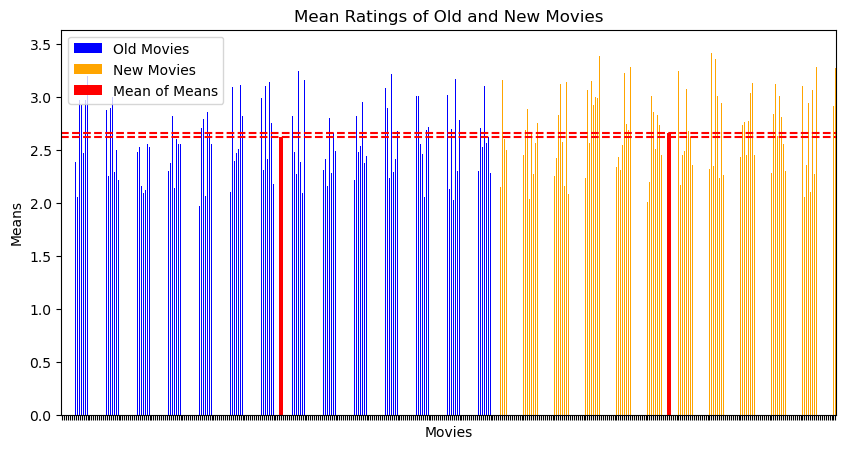

In [27]:
# Repeat what has done in the previous question for visualizing all means of two groups

# For visualization, concat the means of all movies based on their release years
movies_mean = pd.concat([movies_mean_old, movies_mean_new], axis=1)
movies_mean.columns = ['Old Movies', 'New Movies']

# Plot the graph
movies_mean.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 5))

# Plot the mean of means just to make everything clear
plt.bar([len(movies_mean_old)/2], [np.mean(movies_mean_old), np.mean(movies_mean_old)], color='red', width=2, label="Mean of Means")
plt.bar([len(movies_year)/2 + len(movies_mean_old)/2], [np.mean(movies_mean_new), np.mean(movies_mean_new)], color='red', width=2)
plt.axhline(y=np.mean(movies_mean_old), color='red', linestyle='--')
plt.axhline(y=np.mean(movies_mean_new), color='red', linestyle='--')

plt.xticks(visible=False) # Hide the movies' names because they are too long
plt.title("Mean Ratings of Old and New Movies")
plt.xlabel("Movies")
plt.ylabel("Means")
plt.legend()
plt.show()

# Clearly, there is only tiny difference between the mean ratings of two groups of movies. 

### Ans - Movies that are newer are not really rated differently than movies that are older.

## 3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [28]:
# Separate Shrek ratings into groups of female and male

shrek_ratings = file['Shrek (2001)']
movies_genders = file.iloc[:, 474]

shrek_genders_f = pd.concat([shrek_ratings, movies_genders], axis=1)[movies_genders == 1]['Shrek (2001)']
shrek_genders_m = pd.concat([shrek_ratings, movies_genders], axis=1)[movies_genders == 2]['Shrek (2001)']

In [29]:
# Since there is a large discrepency between sample rating sizes contribued by the female viewers 
# and that contributed by the male viewers, I don't think deducing the data to samples means would be
# reasonable because one group might be more susceptible to bias than the other.

print('Size of Female Viewers:', len(shrek_genders_f))
print('Size of Male Viewers:', len(shrek_genders_m))
print()
print('Variance of Female Viewers:', np.var(shrek_genders_f))
print('Variance of Male Viewers:', np.var(shrek_genders_m))

Size of Female Viewers: 807
Size of Male Viewers: 260

Variance of Female Viewers: 0.8207206244373231
Variance of Male Viewers: 0.6777603691396509


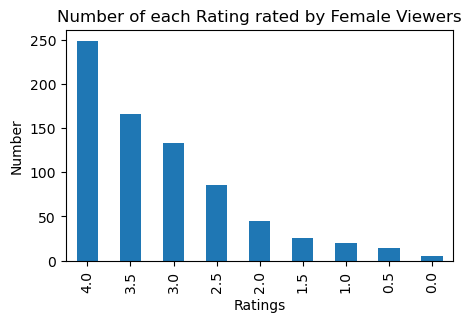

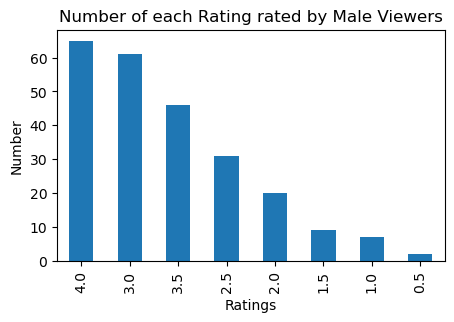

In [30]:
# Concat two ratings into one DataFrame for statistical use

shrek_genders_f.value_counts().plot(kind='bar', figsize=(5, 3))
plt.title("Number of each Rating rated by Female Viewers")
plt.xlabel("Ratings")
plt.ylabel("Number")
plt.show()

shrek_genders_m.value_counts().plot(kind='bar', figsize=(5, 3))
plt.title("Number of each Rating rated by Male Viewers")
plt.xlabel("Ratings")
plt.ylabel("Number")
plt.show()

# The data distribution of both groups are somewhat skewed so we are going to use medians in statistical test

In [31]:
# Choose a statistical test to use

# -> it is not resonable to deduce the data to sample means due to unequal sample sizes
# -> the data is not categorical
# -> 2 groups are compared
# -> compare the medians as mentioned above
# -> Mann Whitney U Test

# Null Hypothesis - ratings do not correspond to genders

statistic, pvalue = stats.mannwhitneyu(shrek_genders_f.dropna(), shrek_genders_m.dropna())

print('The p-value is:', pvalue)
if pvalue > alpha_level:
    print('We cannot reject the null hypothesis because the p-value is greater than the alpha.')
else:
    print('We reject the null hypothesis because the p-value is smaller than the alpha.')

The p-value is: 0.050536625925559006
We cannot reject the null hypothesis because the p-value is greater than the alpha.


### Ans - There isn't statistical significance in the correspondence of ratings and genders according to the p-value of the Mann Whitney U test, so the enjoyment of Shrek (2001) is probably not gendered.

## 4) What proportion of movies are rated differently by male and female viewers?

In [32]:
# Expanded what have done above to calculate the p-value of deducing if the ratings of 
# Shrek (2001) movie is gendered to all movies.

# Assumption: The characteristics of ratings of Shrek (2001) (e.g., the sample sizes bewteen ratings 
# provided by female viewers and those provided by male viewers are unequal) would be similar to all 
# other movies.

movies_genders_f = movies[movies_genders == 1]
movies_genders_m = movies[movies_genders == 2]

pvalues_genders = {}


# Perform Mann Whitney U test in every movie

for c in movies.columns:
    statistic, pvalue = stats.mannwhitneyu(movies_genders_f[c].dropna(), movies_genders_m[c].dropna())
    pvalues_genders[c] = pvalue

In [37]:
# Null Hypothesis - the ratings are not gendered - so if the p-value of a movie is less than the alpha level
# then we reject the null hypothesis and states that the ratings of that movie is gendered (or rated
# differently by male and female viewers).

# Proportionality = the number of movies with gendered ratings / the total number of movies

ratio = len([v for v in pvalues_genders.values() if v < alpha_level]) / 400
ratio*100

12.5

### Ans - 12.5% of the movies are rated differently by male and female viewers.

## 5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [11]:
# Separate The Lion King ratings into groups of only-children and and groups with siblings

# Would not consider the ratings made by those who did not respond to this question because we do not know
# which categories they fit into, and incorporating them into either category would introduce bias

lion_ratings = file['The Lion King (1994)']
movies_onlychild = file.iloc[:, 475] # 1 - Yes; 0 - No; -1 - Did not respond

# Ratings provided by those who are only-children
lion_onlychild_y = pd.concat([lion_ratings, movies_onlychild], axis=1)[movies_onlychild == 1]['The Lion King (1994)']
# Ratings provided by those who are having siblings
lion_onlychild_n = pd.concat([lion_ratings, movies_onlychild], axis=1)[movies_onlychild == 0]['The Lion King (1994)']

In [14]:
# Since there is a large discrepency between sample rating sizes contribued by the only-child viewers 
# and that contributed by the non-only-child viewers, so again, I don't think deducing the data to samples 
# means would be reasonable because one group might be more susceptible to bias than the other.

print('Size of Viewers who are only-children:', len(lion_onlychild_y))
print('Size of Viewers who are not only-children:', len(lion_onlychild_n))
print()
print('Variance of Viewers who are only-children:', np.var(lion_onlychild_y))
print('Variance of Viewers who are not only-children:', np.var(lion_onlychild_n))

Size of Viewers who are only-children: 177
Size of Viewers who are not only-children: 894

Variance of Viewers who are only-children: 0.6622297267663698
Variance of Viewers who are not only-children: 0.5151384312891866


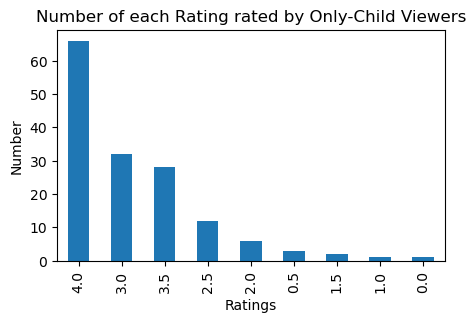

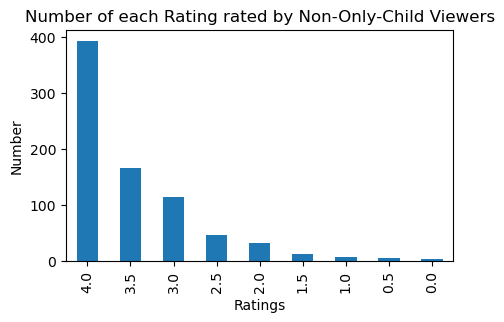

In [16]:
# Concat two ratings into one DataFrame for statistical use

lion_onlychild_y.value_counts().plot(kind='bar', figsize=(5, 3))
plt.title("Number of each Rating rated by Only-Child Viewers")
plt.xlabel("Ratings")
plt.ylabel("Number")
plt.show()

lion_onlychild_n.value_counts().plot(kind='bar', figsize=(5, 3))
plt.title("Number of each Rating rated by Non-Only-Child Viewers")
plt.xlabel("Ratings")
plt.ylabel("Number")
plt.show()

# The data distribution of both groups are somewhat skewed so we are going to use medians in statistical test

In [17]:
# Choose a statistical test to use

# -> it is not resonable to deduce the data to sample means due to unequal sample sizes
# -> the data is not categorical
# -> 2 groups are compared
# -> compare the medians as mentioned above
# -> Mann Whitney U Test

# Null Hypothesis - ratings do not correspond to if the viewers are only-children

statistic, pvalue = stats.mannwhitneyu(lion_onlychild_y.dropna(), lion_onlychild_n.dropna())

print('The p-value is:', pvalue)
if pvalue > alpha_level:
    print('We cannot reject the null hypothesis because the p-value is greater than the alpha.')
else:
    print('We reject the null hypothesis because the p-value is smaller than the alpha.')

The p-value is: 0.04319872995682849
We cannot reject the null hypothesis because the p-value is greater than the alpha.


### Ans - Only-child viewers are probably not enjoying the Lion King (1994) more than viewers with siblings